<a href="https://colab.research.google.com/github/colombiacoin/bogcoin/blob/master/Sprint_Semana_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

1. FASE DE RECOLECCION DE DATOS

Fuente: https://cdn.filestackcontent.com/lBxBImvqThy1c8d1IXvl

In [76]:
#importamos fichero local
from google.colab import files
uploaded = files.upload()

Saving insurance.csv to insurance (1).csv


In [77]:
#analisis exploratorio
import pandas as pd

#creamos variable con dataset
import io
seguros_data = pd.read_csv(io.BytesIO(uploaded['insurance.csv']))

2. FASE DE EXPLORACION (ANALITICA)

In [78]:
import numpy as np # algebra lineal

In [79]:
# nombre de las columnas

seguros_data.columns

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges'], dtype='object')

In [80]:
# consultamos el numero de filas y columnas
seguros_data.shape

(1338, 7)

In [81]:
# exploracion del dataset
seguros_data

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [82]:
# exploracion de las primeras líneas dataset
seguros_data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [83]:
# consultamos datos estadisticos generales: numero de elementos, media, desviacion, valor minimo, percentiles
seguros_data.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
age,1338.0,39.207025,14.049960,18.0000,27.00000,39.000,51.000000,64.00000
bmi,1338.0,30.663397,6.098187,15.9600,26.29625,30.400,34.693750,53.13000
children,1338.0,1.094918,1.205493,0.0000,0.00000,1.000,2.000000,5.00000
charges,1338.0,13270.422265,12110.011237,1121.8739,4740.28715,9382.033,16639.912515,63770.42801


In [85]:
# age         Edad
# sex         Genero
# bmi         Indice de masa corporal
# children    Número de hijos
# smoker      Fuma o No Fuma
# region      Región donde vie
# charges     Prima del seguro

# consultar tipo variables
seguros_data.dtypes

age           int64
sex          object
bmi         float64
children      int64
smoker       object
region       object
charges     float64
dtype: object

3. FASE DE EXPLORACION VISUAL

In [87]:
import matplotlib.pyplot as plp
import seaborn as sns

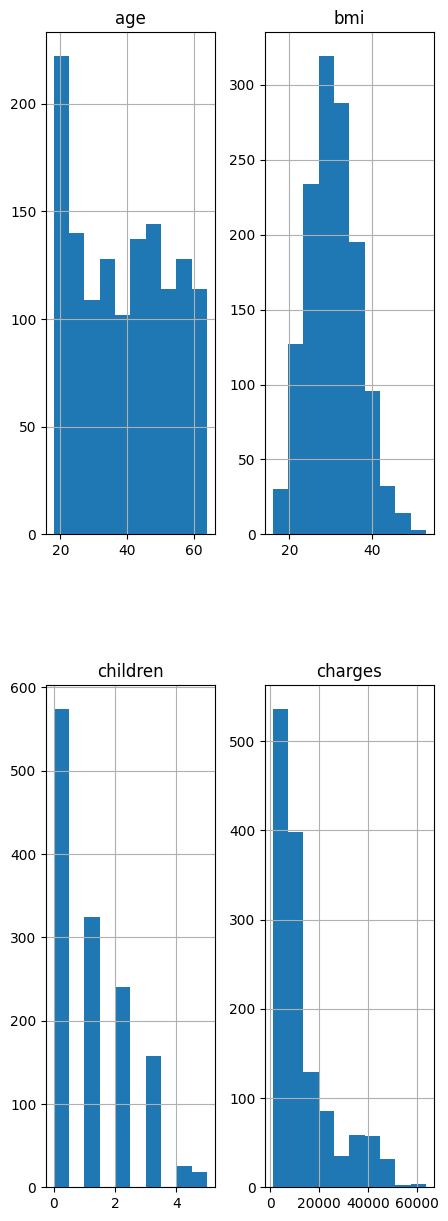

In [88]:
# visualizacion histogramas
seguros_data.hist(figsize=(5,15))
plp.show()

In [89]:
print(seguros_data.columns)

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges'], dtype='object')


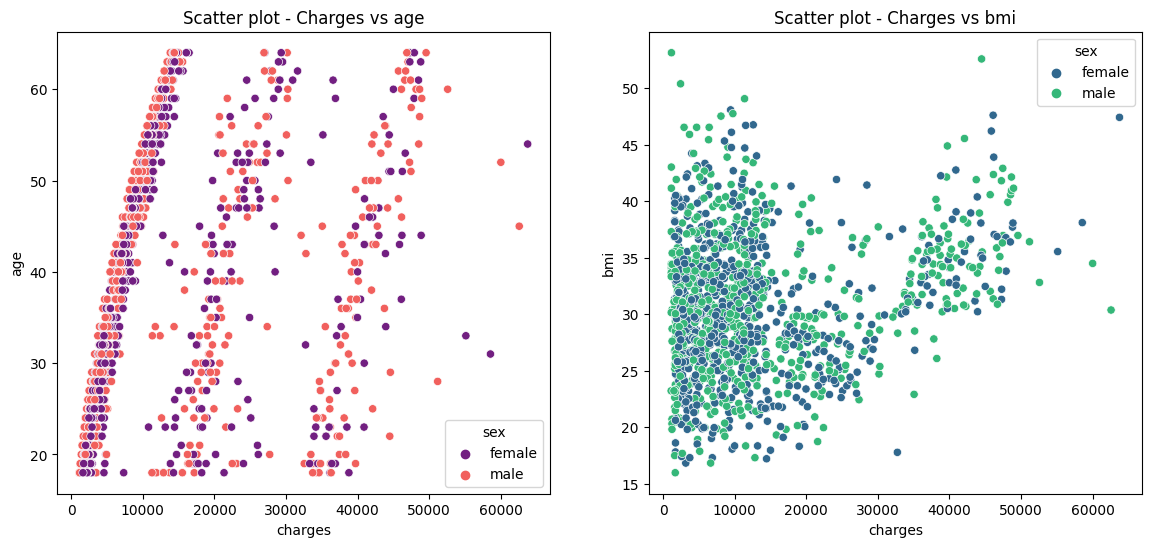

In [90]:
# visualizacion distribución variable selling_price vs fuel y vs fuel

# visualizacion distribución variable selling_price vs fuel y vs fuel
f = plp.figure(figsize=(14,6))
ax = f.add_subplot(121)
sns.scatterplot(x='charges', y='age', data=seguros_data, palette='magma', hue='sex', ax=ax)
ax.set_title('Scatter plot - Charges vs age')
ax = f.add_subplot(122)
sns.scatterplot(x='charges', y='bmi', data=seguros_data, palette='viridis', hue='sex')
ax.set_title('Scatter plot - Charges vs bmi')
plp.savefig('sc.png')


<ipython-input-91-19c3b94a7e9b>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = seguros_data.corr()


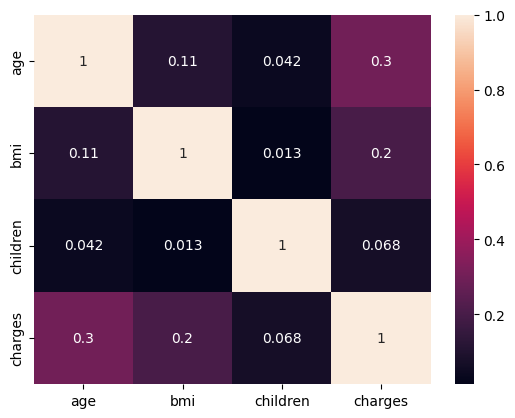

In [91]:
# estudio correlacion de variables
corr = seguros_data.corr()
sns.heatmap(corr, annot= True);

In [92]:
# Consultar tipo variables
seguros_data.dtypes

age           int64
sex          object
bmi         float64
children      int64
smoker       object
region       object
charges     float64
dtype: object

In [93]:
# consultamos si tenemos celdas sin valor
seguros_data.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

Durante el ejercicio, vamos a realizar distintos modelos aplicando distintos tratamientos de datos para ver como éstos afectan al resultado sobre las métricas.

HIPOTESIS 1: Utilizando sólo las variables numéricas.

Dado que los modelos sólo aceptan variables numéricas, vamos a eliminar todas aquellas variables que no lo son

In [94]:
# preparamos el dataset de la hipótesis 1
# borramos las columnas categóricas
categorical_columns = ['sex','smoker', 'region']
seguros_data_hipot1= seguros_data.drop(categorical_columns,axis =1)

In [96]:
# chequeamos nuestro DataSet
seguros_data_hipot1.head()

,age,bmi,children,charges
0,19,27.900,0,16884.92400
1,18,33.770,1,1725.55230
2,28,33.000,3,4449.46200
3,33,22.705,0,21984.47061
4,32,28.880,0,3866.85520


In [97]:
X_hipot1 = seguros_data_hipot1.drop('charges',axis=1) #  variables independientes
y_hipot1 = seguros_data_hipot1['charges'] #  variable depnediente

In [98]:
# preparamos train data y test data
from sklearn.model_selection import train_test_split
X_hipot1_train, X_hipot1_test, y_hipot1_train, y_hipot1_test = train_test_split(X_hipot1, y_hipot1, test_size=0.20, random_state=43)

In [99]:
# Regresion lineal
from sklearn.linear_model import LinearRegression
regresion_lineal=LinearRegression()
regresion_lineal.fit(X_hipot1_train, y_hipot1_train)

LinearRegression()

In [100]:
# FASE VALIDACION

# importamos el cálculo del error cuadrático medio (MSE)
from sklearn.metrics import mean_squared_error

# predecimos los valores y para los datos usados en el entrenamiento
prediccion_entrenamiento = regresion_lineal.predict(X_hipot1_train)

# calculamos el Error Cuadrático Medio (MSE = Mean Squared Error)
mse_hipot1_train = mean_squared_error(y_true = y_hipot1_train, y_pred = prediccion_entrenamiento)
print('Error Cuadrático Medio (MSE) TRAIN= ' + str(mse_hipot1_train))

# predecimos los valores y para los datos usados en el entrenamiento
prediccion_entrenamiento = regresion_lineal.predict(X_hipot1_test)

# calculamos el Error Cuadrático Medio (MSE = Mean Squared Error)
mse_hipot1_test = mean_squared_error(y_true = y_hipot1_test, y_pred = prediccion_entrenamiento)
print('Error Cuadrático Medio (MSE) TEST= ' + str(mse_hipot1_test))

Error Cuadrático Medio (MSE) TRAIN= 128088522.65077363
Error Cuadrático Medio (MSE) TEST= 132839442.2870192


Las métricas obtenidas no son muy buenas, por lo que decidimos avanzar con la segunda hipótesis.

HIPÓTESIS2: Transformamos las variables categóricas en variables numéricas.

Para ello, utilizaremos una técnica llamada one_hot_enconding que permite transformar en un conjunto de 1 y 0 una variable categórica. Por ejemplo, si tuviéramos una variable denominada color, con los valores Azul, Rojo y Verde, el one_hote_encoding crearía 3 variables color_Azul, color_Rojo, color_Verde con los valores 1 y 0 dependiendo de si el valor de la variable original era azul, rojo o verde

In [101]:
# preparamos el dataset de la hipótesis 2
# vamos a tratar algunas de las variables categoricas con la técnica de one_hot_encoding
categorical_columns_2 = ['sex','smoker', 'region']

In [102]:
#Preparamos el dataset de la hipótesis 2
seguros_data_hipot2 = pd.get_dummies(data = seguros_data, prefix = 'OHE', prefix_sep='_',
               columns = categorical_columns_2,
               drop_first =True,
              dtype='int8')

In [ ]:
#Eliminamos la variable categorica name
#seguros_data_hipot2= seguros_data_hipot2.drop('Car_Name',axis =1)

In [103]:
# chequeamos nuestro dataSet
seguros_data_hipot2.head()

,age,bmi,children,charges,OHE_male,OHE_yes,OHE_northwest,OHE_southeast,OHE_southwest
0,19,27.900,0,16884.92400,0,1,0,0,1
1,18,33.770,1,1725.55230,1,0,0,1,0
2,28,33.000,3,4449.46200,1,0,0,1,0
3,33,22.705,0,21984.47061,1,0,1,0,0
4,32,28.880,0,3866.85520,1,0,1,0,0


In [104]:
X_hipot2 = seguros_data_hipot2.drop('charges',axis=1) #  variables independientes
y_hipot2 = seguros_data_hipot2['charges'] #  variable depnediente

# preparamos train data y test data
from sklearn.model_selection import train_test_split
X_hipot2_train, X_hipot2_test, y_hipot2_train, y_hipot2_test = train_test_split(X_hipot2, y_hipot2, test_size=0.20, random_state=43)

In [105]:
#Regresion lineal
from sklearn.linear_model import LinearRegression
regresion_lineal=LinearRegression()
regresion_lineal.fit(X_hipot2_train, y_hipot2_train)

LinearRegression()

In [106]:
# FASE VALIDACION

# predecimos los valores y para los datos usados en el entrenamiento
prediccion_entrenamiento = regresion_lineal.predict(X_hipot2_train)

# calculamos el Error Cuadrático Medio (MSE = Mean Squared Error)
mse_hipot2_train = mean_squared_error(y_true = y_hipot2_train, y_pred = prediccion_entrenamiento)
print('Error Cuadrático Medio (MSE) HIPO 1 TRAIN= ' + str(mse_hipot1_train))
print('Error Cuadrático Medio (MSE) HIPO 2 TRAIN= ' + str(mse_hipot2_train))

# predecimos los valores y para los datos usados en el entrenamiento
prediccion_entrenamiento = regresion_lineal.predict(X_hipot2_test)

# calculamos el Error Cuadrático Medio (MSE = Mean Squared Error)
mse_hipot2_test = mean_squared_error(y_true = y_hipot2_test, y_pred = prediccion_entrenamiento)
print('Error Cuadrático Medio (MSE) HIPO 1 TEST= ' + str(mse_hipot1_test))
print('Error Cuadrático Medio (MSE) HIPO 2 TEST= ' + str(mse_hipot2_test))

Error Cuadrático Medio (MSE) HIPO 1 TRAIN= 128088522.65077363
Error Cuadrático Medio (MSE) HIPO 2 TRAIN= 34954953.93224391
Error Cuadrático Medio (MSE) HIPO 1 TEST= 132839442.2870192
Error Cuadrático Medio (MSE) HIPO 2 TEST= 43001715.787972376


La hipótesis 2 es mucho mejor que la primera, aun así estamos muy lejos de nuestro objetivo.

Tras investigar sobre nuestra variable objetivo, nos damos cuenta que nuestra variable objetivo tiene un rango muy amplio, por lo que intentaremos "normalizar" la variable para conseguir que nuestro algoritmo sea capaz de predecir de un modo más certero.

HIPOTESIS 3: Normalización de variable objetivo.

Para ello, utilizaremos los mecanismos que nos ofrece ScikitLearn para normalizar con los distintos Scaler que posee

In [107]:
# preparamos el dataset de la hipótesis 3
seguros_data_hipot3 = pd.get_dummies(data = seguros_data, prefix = 'OHE', prefix_sep='_',
               columns = categorical_columns_2,
               drop_first =True,
              dtype='int8')

In [ ]:
#Eliminamos la variable categorica name
#car_data_hipot3= car_data_hipot3.drop('Car_Name',axis =1)

In [108]:
X_hipot3 = seguros_data_hipot3.drop('charges',axis=1) #  variables independientes
y_hipot3 = seguros_data_hipot3['charges'] #  variable depnediente

In [109]:
# Escalamos la variable charges para hacerla más estandar
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

#Los algoritmos de preprocessing de sklearn están preparados para convertir matrices por lo que tenemos que hacer una transformación de nuestra variable y
# ya que es una variable de tipo Series
# para ello hacemos un .to_numpy() que nos convierte la serie en un array y luego hacemos reshape (-1,1) que transforma un array de 1xn en una matriz de nx1
y_hipot3 = scaler.fit_transform(y_hipot3.to_numpy().reshape(-1,1))
# Volvemos a transformar nuestra variable en un array de 1xn
y_hipot3=y_hipot3.reshape(1,-1)[0]

In [110]:
# preparamos train data y test data
X_hipot3_train, X_hipot3_test, y_hipot3_train, y_hipot3_test = train_test_split(X_hipot3, y_hipot3, test_size=0.20, random_state=43)

In [111]:
#Regresion lineal
from sklearn.linear_model import LinearRegression
regresion_lineal=LinearRegression()
regresion_lineal.fit(X_hipot3_train, y_hipot3_train)

LinearRegression()

In [112]:
# FASE VALIDACION
# predecimos los valores y para los datos usados en el entrenamiento
prediccion_entrenamiento = regresion_lineal.predict(X_hipot3_train)

# calculamos el Error Cuadrático Medio (MSE = Mean Squared Error)
mse_hipot3_train = mean_squared_error(y_true = y_hipot3_train, y_pred = prediccion_entrenamiento)
print('Error Cuadrático Medio (MSE) HIPO 1 TRAIN= ' + str(mse_hipot1_train))
print('Error Cuadrático Medio (MSE) HIPO 2 TRAIN= ' + str(mse_hipot2_train))
print('Error Cuadrático Medio (MSE) HIPO 3 TRAIN= ' + str(mse_hipot3_train))

# predecimos los valores y para los datos usados en el entrenamiento
prediccion_entrenamiento = regresion_lineal.predict(X_hipot3_test)

# calculamos el Error Cuadrático Medio (MSE = Mean Squared Error)
mse_hipot3_test = mean_squared_error(y_true = y_hipot3_test, y_pred = prediccion_entrenamiento)
print('Error Cuadrático Medio (MSE) HIPO 1 TEST= ' + str(mse_hipot1_test))
print('Error Cuadrático Medio (MSE) HIPO 2 TEST= ' + str(mse_hipot2_test))
print('Error Cuadrático Medio (MSE) HIPO 3 TEST= ' + str(mse_hipot3_test))

Error Cuadrático Medio (MSE) HIPO 1 TRAIN= 128088522.65077363
Error Cuadrático Medio (MSE) HIPO 2 TRAIN= 34954953.93224391
Error Cuadrático Medio (MSE) HIPO 3 TRAIN= 0.23853073589806242
Error Cuadrático Medio (MSE) HIPO 1 TEST= 132839442.2870192
Error Cuadrático Medio (MSE) HIPO 2 TEST= 43001715.787972376
Error Cuadrático Medio (MSE) HIPO 3 TEST= 0.29344140838139343


YEAH! La hipótesis 3 ya tiene unos resultados mejores. Vamos a probar una hipótesis adicional para intentar normalizar todas las variables.

HIPOTESIS 4: Normalizando todas las variables

In [120]:
seguros_data_hipot4 = pd.get_dummies(data = seguros_data, prefix = 'OHE', prefix_sep='_',
               columns = categorical_columns_2,
               drop_first =True,
              dtype='int8')

#Eliminamos la variable categorica name
#seguros_data_hipot4= seguros_data_hipot4.drop('Car_Name',axis =1)

In [121]:
X_hipot4 = seguros_data_hipot4.drop('charges',axis=1) #  variables independientes
y_hipot4 = seguros_data_hipot4['charges'] #  variable depnediente

In [122]:
# Scaling Data
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_hipot4 = scaler.fit_transform(X_hipot4)
#Los algoritmos de preprocessing de sklearn están preparados para convertir matrices por lo que tenemos que hacer una transformación de nuestra variable y
# ya que es una variable de tipo Series
# para ello hacemos un .to_numpy() que nos convierte la serie en un array y luego hacemos reshape (-1,1) que transforma un array de 1xn en una matriz de nx1
y_hipot4 = scaler.fit_transform(y_hipot4.to_numpy().reshape(-1,1))
# Volvemos a transformar nuestra variable en un array de 1xn
y_hipot4=y_hipot4.reshape(1,-1)[0]

In [123]:
# preparamos train data y test data
X_hipot4_train, X_hipot4_test, y_hipot4_train, y_hipot4_test = train_test_split(X_hipot4, y_hipot4, test_size=0.20, random_state=43)

In [124]:
#Regresion lineal
from sklearn.linear_model import LinearRegression
regresion_lineal=LinearRegression()
regresion_lineal.fit(X_hipot4_train, y_hipot4_train)

LinearRegression()

In [125]:
# FASE VALIDACION
# predecimos los valores y para los datos usados en el entrenamiento
prediccion_entrenamiento = regresion_lineal.predict(X_hipot4_train)

# calculamos el Error Cuadrático Medio (MSE = Mean Squared Error)
mse_hipot4_train = mean_squared_error(y_true = y_hipot4_train, y_pred = prediccion_entrenamiento)
print('Error Cuadrático Medio (MSE) HIPO 1 TRAIN= ' + str(mse_hipot1_train))
print('Error Cuadrático Medio (MSE) HIPO 2 TRAIN= ' + str(mse_hipot2_train))
print('Error Cuadrático Medio (MSE) HIPO 3 TRAIN= ' + str(mse_hipot3_train))
print('Error Cuadrático Medio (MSE) HIPO 4 TRAIN= ' + str(mse_hipot4_train))

# predecimos los valores y para los datos usados en el entrenamiento
prediccion_entrenamiento = regresion_lineal.predict(X_hipot4_test)

# calculamos el Error Cuadrático Medio (MSE = Mean Squared Error)
mse_hipot4_test = mean_squared_error(y_true = y_hipot4_test, y_pred = prediccion_entrenamiento)
print('Error Cuadrático Medio (MSE) HIPO 1 TEST= ' + str(mse_hipot1_test))
print('Error Cuadrático Medio (MSE) HIPO 2 TEST= ' + str(mse_hipot2_test))
print('Error Cuadrático Medio (MSE) HIPO 3 TEST= ' + str(mse_hipot3_test))
print('Error Cuadrático Medio (MSE) HIPO 4 TEST= ' + str(mse_hipot4_test))

Error Cuadrático Medio (MSE) HIPO 1 TRAIN= 128088522.65077363
Error Cuadrático Medio (MSE) HIPO 2 TRAIN= 34954953.93224391
Error Cuadrático Medio (MSE) HIPO 3 TRAIN= 0.23853073589806242
Error Cuadrático Medio (MSE) HIPO 4 TRAIN= 0.23853073589806245
Error Cuadrático Medio (MSE) HIPO 1 TEST= 132839442.2870192
Error Cuadrático Medio (MSE) HIPO 2 TEST= 43001715.787972376
Error Cuadrático Medio (MSE) HIPO 3 TEST= 0.29344140838139343
Error Cuadrático Medio (MSE) HIPO 4 TEST= 0.2934414083813933


Ups! Como puedes ver en las métricas nuestro escalado de todas las variables no ha tenido mejores resultados. Esto se debe a que las variables que hemos transformado con one_hot_encoding ya tenían valores normales

¿Te atreves a probar otros métodos de escalado? (https://scikit-learn.org/stable/search.html?q=scaler)

HIPOTESIS 5: Utilizando otro escalado

In [127]:
seguros_data_hipot5 = pd.get_dummies(data = seguros_data, prefix = 'OHE', prefix_sep='_',
               columns = categorical_columns_2,
               drop_first =True,
              dtype='int8')

In [128]:
#Eliminamos la variable categorica name
#seguros_data_hipot5= seguros_data_hipot5.drop('Car_Name',axis =1)

In [129]:
# Scaling Data
from sklearn.preprocessing import MaxAbsScaler
scaler = MaxAbsScaler()
seguros_data_hipot5[["age","charges"]] = scaler.fit_transform(seguros_data_hipot5[["age","charges"]] )

In [130]:
X_hipot5 = seguros_data_hipot5.drop('charges',axis=1) #  variables independientes
y_hipot5 = seguros_data_hipot5['charges'] #  variable depnediente

In [131]:
# preparamos train data y test data
X_hipot5_train, X_hipot5_test, y_hipot5_train, y_hipot5_test = train_test_split(X_hipot5, y_hipot5, test_size=0.20, random_state=43)
regresion_lineal=LinearRegression()
regresion_lineal.fit(X_hipot5_train, y_hipot5_train)

LinearRegression()

In [132]:
# FASE VALIDACION

# predecimos los valores y para los datos usados en el entrenamiento
prediccion_entrenamiento = regresion_lineal.predict(X_hipot5_train)

# calculamos el Error Cuadrático Medio (MSE = Mean Squared Error)
mse_hipot5_train = mean_squared_error(y_true = y_hipot5_train, y_pred = prediccion_entrenamiento)
print('Error Cuadrático Medio (MSE) HIPO 1 TRAIN= ' + str(mse_hipot1_train))
print('Error Cuadrático Medio (MSE) HIPO 2 TRAIN= ' + str(mse_hipot2_train))
print('Error Cuadrático Medio (MSE) HIPO 3 TRAIN= ' + str(mse_hipot3_train))
print('Error Cuadrático Medio (MSE) HIPO 5 TRAIN= ' + str(mse_hipot5_train))

# predecimos los valores y para los datos usados en el entrenamiento
prediccion_entrenamiento = regresion_lineal.predict(X_hipot5_test)

# calculamos el Error Cuadrático Medio (MSE = Mean Squared Error)
mse_hipot5_test = mean_squared_error(y_true = y_hipot5_test, y_pred = prediccion_entrenamiento)
print('Error Cuadrático Medio (MSE) HIPO 1 TEST= ' + str(mse_hipot1_test))
print('Error Cuadrático Medio (MSE) HIPO 2 TEST= ' + str(mse_hipot2_test))
print('Error Cuadrático Medio (MSE) HIPO 3 TEST= ' + str(mse_hipot3_test))
print('Error Cuadrático Medio (MSE) HIPO 5 TEST= ' + str(mse_hipot5_test))

Error Cuadrático Medio (MSE) HIPO 1 TRAIN= 128088522.65077363
Error Cuadrático Medio (MSE) HIPO 2 TRAIN= 34954953.93224391
Error Cuadrático Medio (MSE) HIPO 3 TRAIN= 0.23853073589806242
Error Cuadrático Medio (MSE) HIPO 5 TRAIN= 0.00859547873791412
Error Cuadrático Medio (MSE) HIPO 1 TEST= 132839442.2870192
Error Cuadrático Medio (MSE) HIPO 2 TEST= 43001715.787972376
Error Cuadrático Medio (MSE) HIPO 3 TEST= 0.29344140838139343
Error Cuadrático Medio (MSE) HIPO 5 TEST= 0.01057419026973425


Como puedes ver, con este tipo de escalado hemos obtenido los mejores resultados!!!!